## Brain figure generation
Create a mask, taking from reference the FSAverage subject of FreeSurfer. To run this script, we need to run first permutation_test.ipynb, to generate the file with the probabilities, or you can input your own probabilities file.

Define the results directory and the concrete file we are using to draw the probabilities from:

In [38]:
results_dir = '../results/cimlr4/'
file_prob = 'percentiles.csv'

Create a mask for the selected cluster, representing the different probabilities over the corresponding region.

In [39]:
%matplotlib inline
import nibabel as nib
import numpy as np
import pandas as pd

# Load Atlas
atlas='fsaverage/brain.mgz'
labels='fsaverage/aseg.mgz'
labels_csv = 'fsaverage/labels.csv'
# Load files
nib_atlas = nib.load(atlas)
nib_atlas_array = np.array(nib_atlas.dataobj)

nib_labels = nib.load(labels)
nib_labels_array = np.array(nib_labels.dataobj)

# Load probabilities
df_prob = pd.read_csv(file_prob, index_col=0, header=0).T
# Load labels
df_labels = pd.read_csv(labels_csv, sep=' ')

# For each probability in the df_prob file, assign it to the corresponding ROI
mask = np.zeros((nib_labels_array.shape[0], nib_labels_array.shape[1], nib_labels_array.shape[2]))

for line in df_prob.itertuples():
    # Get label
    curr_label = line.Index
    prob = line[3]
    i = int(df_labels[df_labels.Label == curr_label].Index)
    mask[nib_labels_array==i] = prob
    

new_image_mri = nib.Nifti1Image(mask, nib_labels.affine)
# Save
nib.save(new_image_mri,'mask.mgz')

Generate the figure:

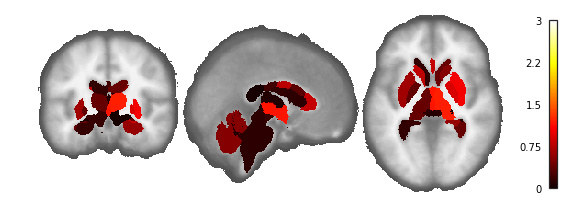

In [41]:
from nilearn import plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
%matplotlib inline
sns.set(style="white")

plotting.plot_stat_map('mask.mgz', bg_img=atlas, annotate=False, black_bg=False, draw_cross=False, vmax=3, cut_coords=(0,-14,0))
plotting.show()

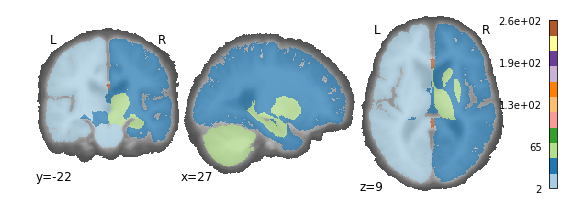

In [8]:
plotting.plot_roi(labels, bg_img=atlas, annotate=True, black_bg=False, draw_cross=False, cmap='Paired', colorbar=True)
plotting.show()